<a href="https://colab.research.google.com/github/fersilverio/A-Star-MOA/blob/master/deep-learning/2-redes-convolucionais/deep_cnn_generica_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 - Carregando as bibliotecas

In [14]:
import keras
from keras import datasets, models, layers, utils, backend
import cv2, random, os
import numpy as np
from matplotlib import pyplot as plt



2 - Formatando os dados de entrada

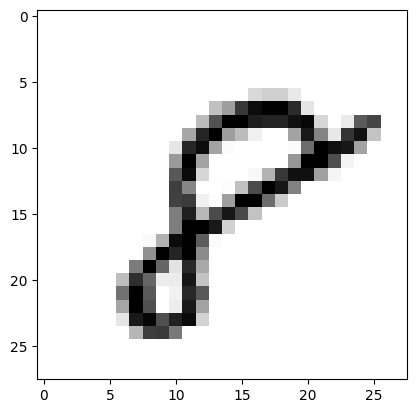

In [15]:
# para garantir que os canais de entrada sejam iguais ao que a biblioteca espera
backend.set_image_data_format('channels_first')

(X_train, Y_train), (X_val, Y_val) = datasets.mnist.load_data()

image = X_train[59999]
plt.imshow(image, cmap='gray_r')

# realizando normalizacao
X_train = X_train.astype('float32') / 255.0
# realizando normalizacao
X_val = X_val.astype('float32') / 255.0

Y_train = utils.to_categorical(Y_train)
Y_val = utils.to_categorical(Y_val)

num_classes = 10




3- Construindo o modelo da rede neural

In [16]:
# Definindo modelo sequencial para empilhar camadas
model = models.Sequential()

model.add(layers.Reshape((1, 28, 28), input_shape=(28, 28, 1)))
model.add(layers.Conv2D(30, (5,5), strides=(1,1), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(num_classes, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4- Executando o treinamento

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=15, batch_size=200)


Epoch 1/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8296 - loss: 0.5686 - val_accuracy: 0.9744 - val_loss: 0.0823
Epoch 2/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9758 - loss: 0.0837 - val_accuracy: 0.9823 - val_loss: 0.0513
Epoch 3/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9824 - loss: 0.0555 - val_accuracy: 0.9860 - val_loss: 0.0407
Epoch 4/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9869 - loss: 0.0414 - val_accuracy: 0.9853 - val_loss: 0.0435
Epoch 5/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9883 - loss: 0.0366 - val_accuracy: 0.9911 - val_loss: 0.0297
Epoch 6/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9909 - loss: 0.0283 - val_accuracy: 0.9909 - val_loss: 0.0292
Epoch 7/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9930 - loss: 0.0220 - val_accuracy: 0.9900 - val_loss: 0.0282
Epoch 8/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9938 - loss: 0.0192 - val_accuracy: 0.

5- Testando a rede treinada com uma imagem que não pertence ao dataset

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
Predição da classe: 8
Predição (probabilidades): 
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
1.0000
0.0000


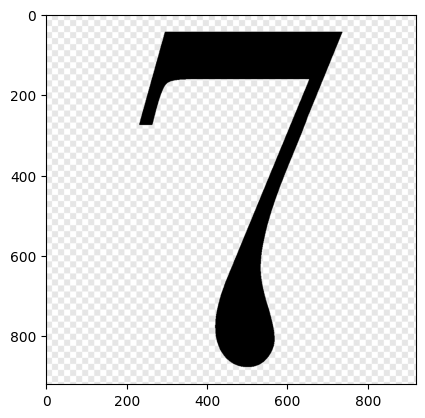

In [18]:
pred_img = cv2.imread('digito7.png', 0)

plt.imshow(pred_img, cmap='gray')

if(pred_img.shape != (28, 28)):
    pred_img = cv2.resize(pred_img, (28, 28))

pred_img = pred_img.reshape(1, 28, 28, 1)

pred_proba = model.predict(pred_img)

# obtendo classe com maior probabilidade, axis=-1 para buscar ultimo eixo
pred = np.argmax(pred_proba, axis=-1)

print(f'Predição da classe: {pred[0]}')
print('Predição (probabilidades): ')

for proba in pred_proba[0]:
    print(f'{proba:.4f}')